## Housing Price Prediction using Advanced Regression
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

### Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [80]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [81]:
# reading the dataset
df = pd.read_csv(r"C:\Users\Ramanujam SESHADRI\Downloads/train.csv")

### Basic Data Check

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [83]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [85]:
df.shape

(1460, 81)

In [86]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


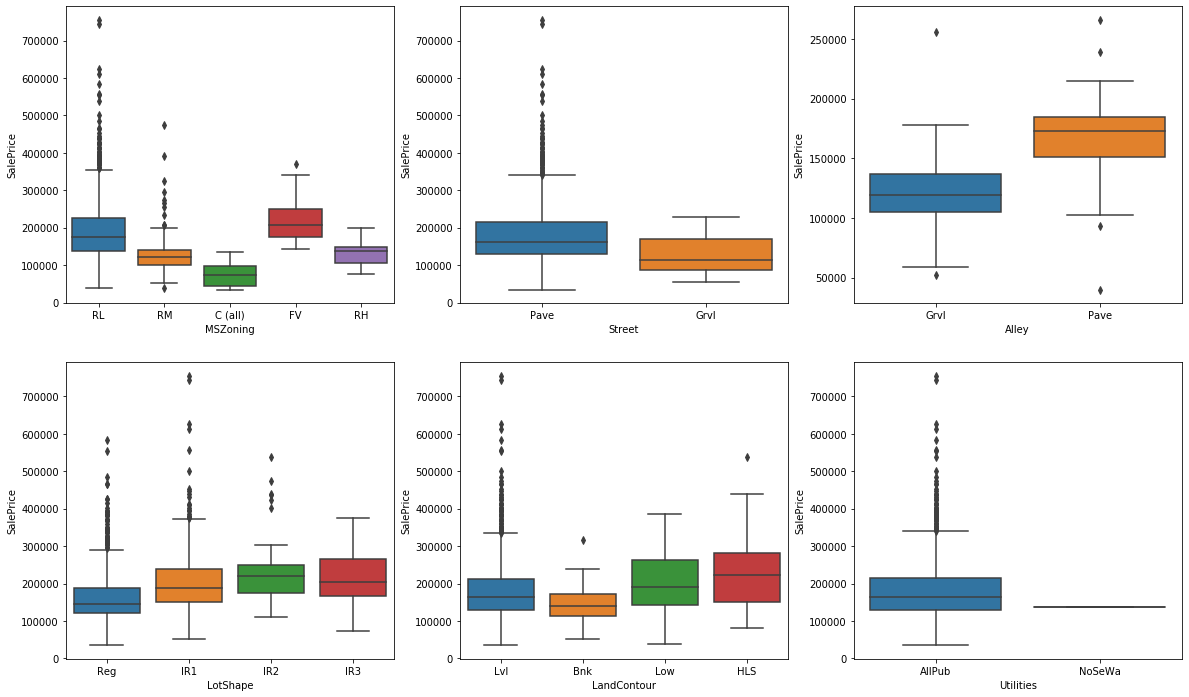

In [87]:
#Visualising some Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'Street', y = 'SalePrice', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = df)
plt.show()

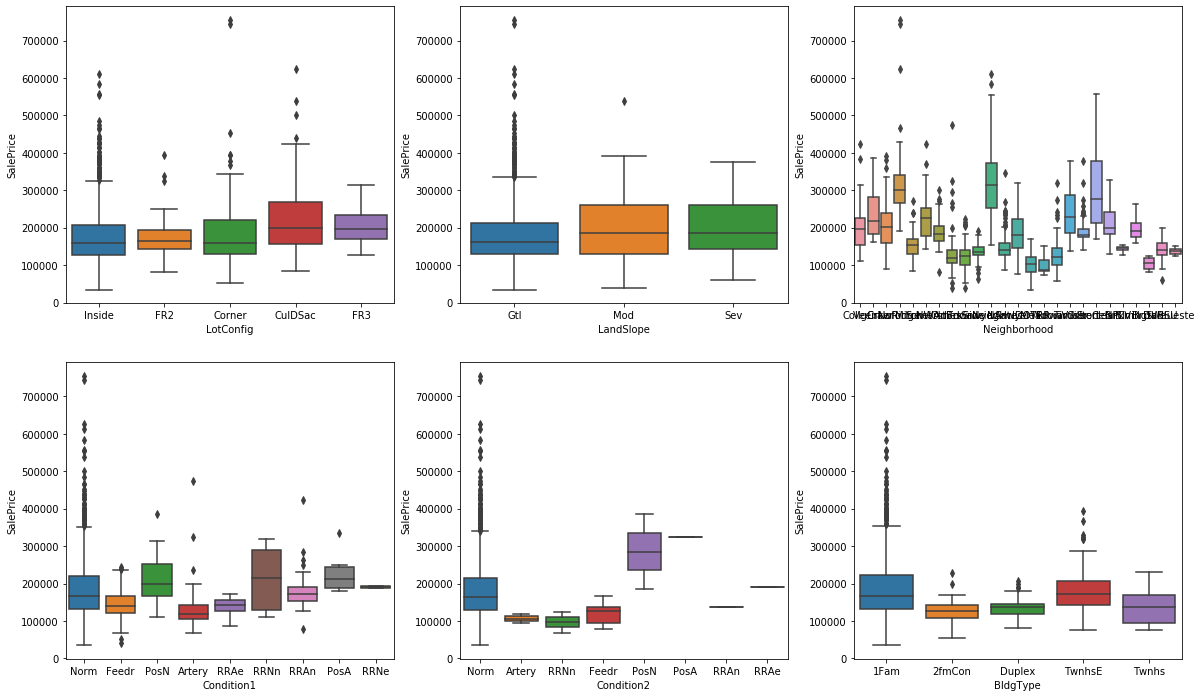

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df)
plt.show()

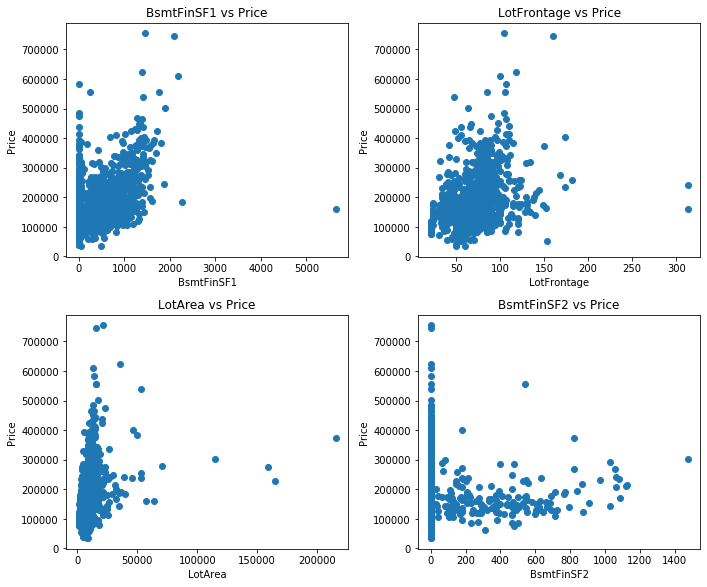

In [89]:
#Visualising numerical data
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['SalePrice'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('BsmtFinSF1', 1)
scatter('LotFrontage', 2)
scatter('LotArea', 3)
scatter('BsmtFinSF2', 4)

plt.tight_layout()

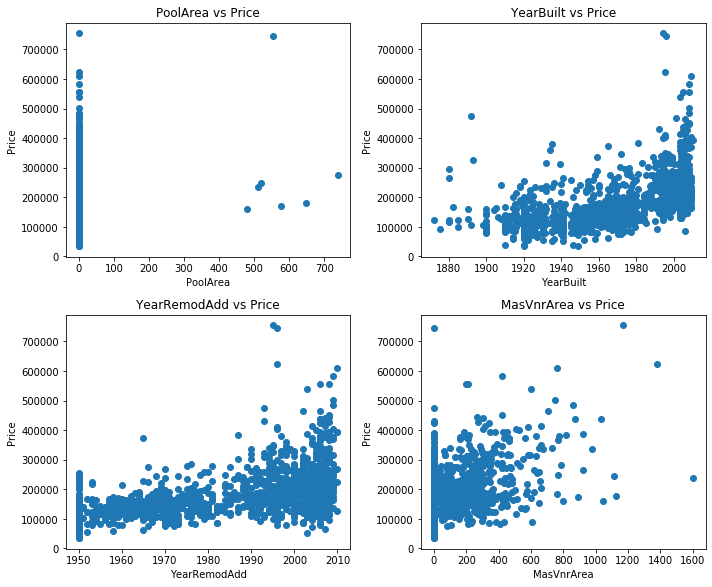

In [90]:
#Visualising numerical data
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['SalePrice'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('PoolArea', 1)
scatter('YearBuilt', 2)
scatter('YearRemodAdd', 3)
scatter('MasVnrArea', 4)

plt.tight_layout()

### Missing Value Check

In [91]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

### Data Preparartion

In [92]:
# Looks like the data types of some columns are wrong so lets correct them
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['OverallQual'] = df['OverallQual'].astype(object)
df['OverallCond'] = df['OverallCond'].astype(object)

In [93]:
df.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [94]:
# Lets impute missing values
df["PoolQC"] = df["PoolQC"].fillna("None") 
df["MiscFeature"] = df["MiscFeature"].fillna("None") 
df["Alley"] = df["Alley"].fillna("None") 
df["Fence"] = df["Fence"].fillna("None")
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

df["LotFrontage"] = df["LotFrontage"].fillna(df['LotFrontage'].mode()[0])

df["GarageCond"] = df["GarageCond"].fillna("None") 
df["GarageQual"] = df["GarageQual"].fillna("None") 
df["GarageFinish"] = df["GarageFinish"].fillna("None") 
df["GarageType"] = df["GarageType"].fillna("None")

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)
df["GarageArea"] = df["GarageArea"].fillna(0)

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
    
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

df.drop(['Utilities'], axis=1, inplace=True)

df["Functional"] = df["Functional"].fillna("Typ")

for col in ('KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType'):
    df[col] = df[col].fillna(df[col].mode()[0])
    
df['MSSubClass'] = df['MSSubClass'].fillna("None")

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

df['YrSold'] = 2020 - df['YrSold']
df['YearBuilt'] = 2020 - df['YearBuilt']
df['YearRemodAdd'] = 2020 - df['YearRemodAdd']
df['GarageYrBlt'] = 2020 - df['GarageYrBlt']

df.drop(['MoSold'], axis=1, inplace=True)

In [95]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,None,0,12,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,0,None,None,None,0,13,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,0,None,None,None,0,12,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,0,None,None,None,0,14,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,0,None,None,None,0,12,WD,Normal,250000


In [96]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
                ... 
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF   

Looks like we have no more missing values so we can proceed

### Checking Target Variable

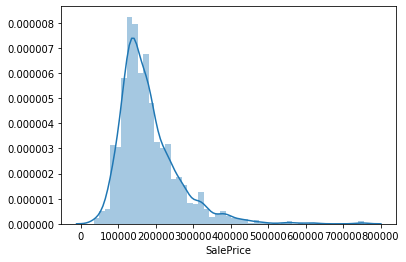

In [97]:
sns.distplot(df['SalePrice'])
plt.show()

In [98]:
# The target variable is not normally distributed so lets convert the values into log values
df["SalePrice"] = np.log1p(df["SalePrice"])

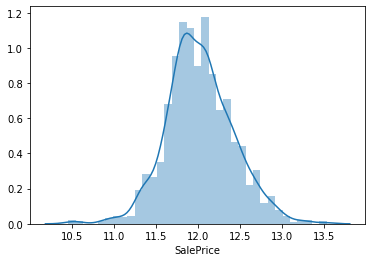

In [99]:
sns.distplot(df['SalePrice'])
plt.show()

Now the target variable looks normally distributed

### Converting Y/N to 1 and 0

In [100]:
binary_cols=[col for col in df if np.isin(df[col].unique(), ['Y', 'N']).all()]
binary_cols

['CentralAir']

In [101]:
# Defining the map function to map all yes to 1 and no to 0
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the data
df[binary_cols] = df[binary_cols].apply(binary_map)

In [102]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,...,0,0,None,None,None,0,12,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,...,0,0,None,None,None,0,13,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,...,0,0,None,None,None,0,12,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,...,0,0,None,None,None,0,14,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,...,0,0,None,None,None,0,12,WD,Normal,12.429220


In [103]:
df.drop(['Id'], axis=1, inplace=True)
df['MSSubClass'] = df['MSSubClass'].astype(object)
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


### Creating new feature

In [104]:
# Adding total sqfootage feature 
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

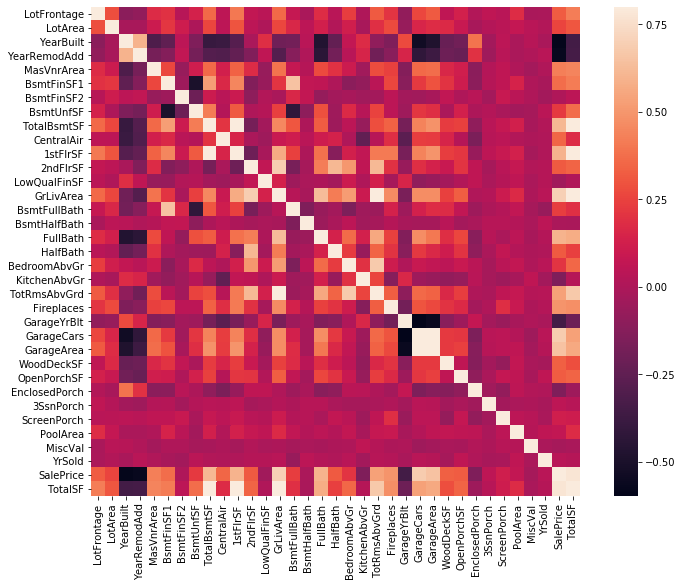

In [105]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [106]:
categorical_vars = list(df.select_dtypes(['object']).columns)
categorical_vars

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [107]:
numeric_vars = list(df.select_dtypes(['float64', 'int64']).columns)
numeric_vars

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice',
 'TotalSF']

### Checking Skewness of data

In [108]:
df.skew(axis = 0)

MSSubClass        1.407657
LotFrontage       2.504092
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt         0.613461
YearRemodAdd      0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
CentralAir       -3.530386
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt       3.869501
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
YrSold           -0.096269
SalePrice         0.121347
T

In [109]:
for i in categorical_vars:
    print(df[i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr 

In [110]:
skewedData = ['Street', 'Alley', 'LandContour', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df.drop(skewedData, axis=1, inplace=True)

In [111]:
categorical_vars = list(df.select_dtypes(['object']).columns)
categorical_vars

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [112]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice,TotalSF
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,61,0,0,0,0,0,12,12.247699,2566
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,298,0,0,0,0,0,0,13,12.109016,2524
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,42,0,0,0,0,0,12,12.317171,2706
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,35,272,0,0,0,0,14,11.849405,2473
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,192,84,0,0,0,0,0,12,12.429220,3343


In [113]:
# Creating Dummies
dummy_data=pd.get_dummies(df[categorical_vars])
dummy_data.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [114]:
df1=pd.concat([df,dummy_data],axis=1)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,1,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,1,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,1,0


In [115]:
df2=df1.drop(categorical_vars,axis=1)

In [116]:
df2.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,17,17,196.0,706,0,150,856,1,...,1,0,0,0,0,0,0,0,1,0
1,80.0,9600,44,44,0.0,978,0,284,1262,1,...,1,0,0,0,0,0,0,0,1,0
2,68.0,11250,19,18,162.0,486,0,434,920,1,...,1,0,0,0,0,0,0,0,1,0
3,60.0,9550,105,50,0.0,216,0,540,756,1,...,0,0,0,0,1,0,0,0,0,1
4,84.0,14260,20,20,350.0,655,0,490,1145,1,...,1,0,0,0,0,0,0,0,1,0


In [117]:
X = df2
X=X.drop(['SalePrice'] ,axis=1)
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,65.0,8450,17,17,196.0,706,0,150,856,1,...,1,0,0,0,0,0,0,0,1,0
1,80.0,9600,44,44,0.0,978,0,284,1262,1,...,1,0,0,0,0,0,0,0,1,0
2,68.0,11250,19,18,162.0,486,0,434,920,1,...,1,0,0,0,0,0,0,0,1,0
3,60.0,9550,105,50,0.0,216,0,540,756,1,...,0,0,0,0,1,0,0,0,0,1
4,84.0,14260,20,20,350.0,655,0,490,1145,1,...,1,0,0,0,0,0,0,0,1,0


In [118]:
y = df2['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

### Scaling

In [119]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None',
       'GarageFinish_Fin', 'GarageFinish_None', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=209)

In [120]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,-0.146189,-0.207142,-1.050994,-0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191
1,0.524992,-0.091886,-0.156734,0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191
2,-0.011953,0.073480,-0.984752,-0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191
3,-0.369915,-0.096897,1.863632,0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,0.263813,...,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.24236,-0.56364,-0.24236,-0.637614,1.188791
4,0.703973,0.375148,-0.951632,-0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191


### Model Building

In [121]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [122]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 
                    12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
                                   13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20,
                                   50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [123]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016925,0.007981,0.000000,0.000000,0.001,{'alpha': 0.001},-0.099016,-0.097282,-0.109308,-0.095916,...,-0.100746,0.004769,26,-0.077283,-0.067884,-0.071402,-0.078578,-0.077599,-0.074549,0.004180
1,0.012501,0.006250,0.000000,0.000000,0.01,{'alpha': 0.01},-0.099008,-0.097283,-0.109307,-0.095906,...,-0.100742,0.004771,25,-0.077283,-0.067883,-0.071401,-0.078576,-0.077598,-0.074548,0.004179
2,0.011227,0.009766,0.000200,0.000400,0.05,{'alpha': 0.05},-0.098978,-0.097289,-0.109302,-0.095866,...,-0.100727,0.004778,24,-0.077284,-0.067879,-0.071398,-0.078567,-0.077596,-0.074545,0.004179
3,0.010994,0.001099,0.002797,0.001168,0.1,{'alpha': 0.1},-0.098951,-0.097293,-0.109295,-0.095825,...,-0.100711,0.004785,23,-0.077285,-0.067877,-0.071394,-0.078558,-0.077593,-0.074541,0.004178
4,0.007324,0.004957,0.000614,0.000502,1,{'alpha': 1.0},-0.098717,-0.097255,-0.109157,-0.095423,...,-0.100500,0.004826,22,-0.077257,-0.067857,-0.071344,-0.078483,-0.077568,-0.074502,0.004171


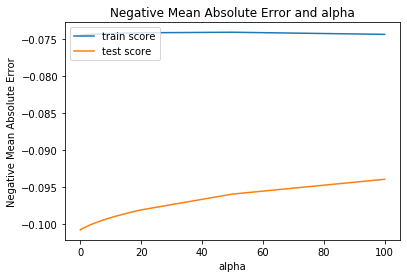

In [124]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [125]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.20409472e-02,  1.78440203e-02, -2.98463747e-02, -2.26108679e-02,
       -2.75085048e-03, -9.93435178e-03, -1.17641406e-03,  5.90180797e-03,
       -4.81645220e-03,  9.28390792e-03,  1.69366305e-02,  4.01511412e-02,
        1.47825726e-03,  4.59512605e-02,  2.37062521e-02,  4.41955464e-03,
        2.95515687e-02,  1.84944998e-02,  3.05234215e-03, -2.22955082e-02,
        1.64053143e-02, -4.14227641e-03, -3.41204584e-03,  3.69069774e-02,
        8.73582318e-03,  1.13197957e-02, -1.86613575e-03,  7.90263698e-03,
        5.96784010e-03,  1.06781414e-02, -1.25919915e-02, -1.18993661e-03,
        7.81228269e-03,  2.67265668e-02,  1.21723120e-02, -2.24148227e-02,
       -3.64230145e-03, -8.71091903e-03,  1.37002154e-02, -6.50742120e-03,
        7.73913101e-03,  3.74767923e-03,  4.38114116e-03,  8.21243095e-03,
        1.00895942e-02, -1.08066065e-02, -2.24215138e-02, -5.84255507e-03,
        2.79393342e-03, -3.10080411e-02,  8.67970439e-03,  2.94450297e-03,
        7.28164710e-03, -

In [126]:
from sklearn.metrics import r2_score 
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train, y_pred_train))
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9255044380325022
0.8743766740277858


In [127]:
# Taking the anti-log to preict the price as log was taken initially
final_prediction = np.exp(y_pred_test)
print(final_prediction[:10])

[117891.61894216 181343.11475278 181966.51378045 193845.22108293
 119128.09034804 271400.54461053 220096.39687578 282098.54539142
 106026.36333854 176854.51436503]


In [128]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0, ridge.intercept_)
cols = X.columns
cols = cols.insert(0, 'constant')
ridge_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_coef.columns = ['Feature', 'Coef']

In [129]:
ridge_coef.sort_values(by='Coef', ascending=False).head(11)

,Feature,Coef
0,constant,12.022235
14,GrLivArea,0.045951
12,2ndFlrSF,0.040151
24,GarageCars,0.036907
104,OverallQual_8,0.034540
105,OverallQual_9,0.032376
17,FullBath,0.029552
80,Neighborhood_NridgHt,0.027406
34,TotalSF,0.026727
15,BsmtFullBath,0.023706


In [130]:

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.002, 0.005, 0.009, 0.01]}

# cross validation
folds = 5
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.009, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [131]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.174585,0.009707,0.001604,0.003207,0.0001,{'alpha': 0.0001},-0.098000,-0.096843,-0.108455,-0.094536,...,-0.099785,0.004821,6,-0.077048,-0.067809,-0.071210,-0.078328,-0.077491,-0.074377,0.004138
1,0.050281,0.015851,0.000408,0.000817,0.001,{'alpha': 0.001},-0.092271,-0.093437,-0.103479,-0.089568,...,-0.094333,0.004761,4,-0.076152,-0.067917,-0.070726,-0.077624,-0.077544,-0.073993,0.003951
2,0.034543,0.010314,0.004932,0.006133,0.002,{'alpha': 0.002},-0.089588,-0.092305,-0.100872,-0.086029,...,-0.091582,0.005051,2,-0.076405,-0.068636,-0.071495,-0.077758,-0.078434,-0.074546,0.003824
3,0.017815,0.002974,0.002005,0.003104,0.005,{'alpha': 0.005},-0.086491,-0.092007,-0.100016,-0.083164,...,-0.090159,0.005726,1,-0.078938,-0.072821,-0.075359,-0.080431,-0.081804,-0.077870,0.003316
4,0.015705,0.003892,0.000402,0.000805,0.009,{'alpha': 0.009},-0.085847,-0.095427,-0.104664,-0.085805,...,-0.093278,0.007033,3,-0.084761,-0.079612,-0.081609,-0.085866,-0.087829,-0.083935,0.002956


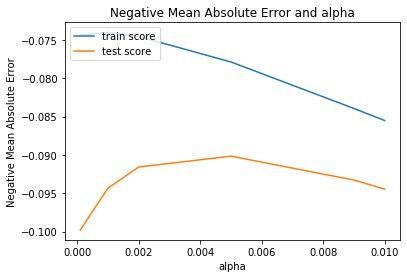

In [132]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [133]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [134]:
lasso.coef_

array([-8.98022897e-03,  1.61381982e-02, -3.33934428e-02, -2.41222767e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  8.82071249e-03,
        0.00000000e+00,  9.70032049e-03,  0.00000000e+00,  5.56304301e-04,
       -3.69213034e-03,  9.46706275e-02,  2.28877319e-02,  2.74594425e-03,
        2.86129075e-02,  1.52329191e-02,  3.29424208e-03, -1.66612201e-02,
        1.30783486e-02,  0.00000000e+00, -8.38470108e-04,  4.26475242e-02,
        2.41911248e-03,  1.04465603e-02, -1.37062579e-04,  5.80307037e-03,
        5.00353803e-03,  8.86709801e-03, -1.17073797e-02, -0.00000000e+00,
        5.87838673e-03,  4.72946586e-03,  1.58993549e-02, -2.12826660e-02,
       -1.86948142e-03, -0.00000000e+00,  4.49781999e-03, -4.67933020e-03,
        4.63754276e-03,  6.63344114e-04, -0.00000000e+00,  1.89099610e-03,
        1.98411221e-03, -6.70237427e-03, -2.35853796e-02, -7.14308487e-03,
       -0.00000000e+00, -3.24654229e-02,  2.78060487e-03,  1.46434897e-05,
        0.00000000e+00, -

In [135]:
from sklearn.metrics import r2_score 
y_pred_train = lasso.predict(X_train)
print(r2_score(y_train, y_pred_train))
y_pred_test = lasso.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9234857519933735
0.8782636733025915


In [136]:
# Taking the anti-log to preict the price as log was taken initially
final_prediction = np.exp(y_pred_test)
print(final_prediction[:10])

[119394.3509584  183814.40723609 177654.84586439 195040.08256774
 119353.35434738 274247.27100551 218379.42526077 279808.51597814
 106933.25008255 173916.32393007]


In [137]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0, lasso.intercept_)
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_coef = pd.DataFrame(list(zip(cols, model_parameter)))
lasso_coef.columns = ['Feature', 'Coef']

In [138]:
lasso_coef.sort_values(by='Coef', ascending=False).head(11)

,Feature,Coef
0,constant,12.022396
14,GrLivArea,0.094671
24,GarageCars,0.042648
104,OverallQual_8,0.041050
105,OverallQual_9,0.034538
17,FullBath,0.028613
80,Neighborhood_NridgHt,0.026542
70,Neighborhood_Crawfor,0.024970
103,OverallQual_7,0.024241
85,Neighborhood_Somerst,0.023591


### SUBJECTIVE QUESTIONS

### Question 1

In [139]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.14307836e-02,  1.74603652e-02, -2.71918842e-02, -2.28133458e-02,
       -2.13383241e-03, -8.77862190e-03, -8.41391910e-04,  5.91853526e-03,
       -3.47486155e-03,  9.41857109e-03,  1.75096846e-02,  3.67678797e-02,
        1.01274762e-03,  4.35192216e-02,  2.30451383e-02,  4.15165079e-03,
        2.95558397e-02,  1.83150283e-02,  3.83865154e-03, -2.11384135e-02,
        1.70067269e-02, -2.47137619e-03, -2.64117844e-03,  3.52483924e-02,
        1.02465423e-02,  1.12344141e-02, -1.82360758e-03,  7.41094964e-03,
        5.87172139e-03,  1.02914806e-02, -1.24204781e-02, -1.22926182e-03,
        7.75468839e-03,  2.59151033e-02,  1.28208790e-02, -2.20543555e-02,
       -3.36026220e-03, -7.82957738e-03,  1.16176140e-02, -5.48698286e-03,
        7.78638097e-03,  3.93175499e-03,  2.98060376e-03,  7.38910638e-03,
        8.98092420e-03, -9.78184859e-03, -2.16330777e-02, -6.03943996e-03,
        1.98578984e-03, -3.05627849e-02,  8.97179737e-03,  2.90821551e-03,
        7.32915095e-03, -

In [140]:
from sklearn.metrics import r2_score 
y_pred_train = ridge.predict(X_train)
print(r2_score(y_train, y_pred_train))
y_pred_test = ridge.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9253230881838509
0.8751248937767098


In [141]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0, ridge.intercept_)
cols = X.columns
cols = cols.insert(0, 'constant')
ridge_coef = pd.DataFrame(list(zip(cols, model_parameter)))
ridge_coef.columns = ['Feature', 'Coef']

In [142]:
ridge_coef.sort_values(by='Coef', ascending=False).head(11)

,Feature,Coef
0,constant,12.022293
14,GrLivArea,0.043519
12,2ndFlrSF,0.036768
24,GarageCars,0.035248
104,OverallQual_8,0.033938
105,OverallQual_9,0.031614
17,FullBath,0.029556
80,Neighborhood_NridgHt,0.026403
34,TotalSF,0.025915
15,BsmtFullBath,0.023045


In [143]:
alpha = 0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [144]:
lasso.coef_

array([-5.29533371e-03,  1.49121933e-02, -3.03136319e-02, -2.65337465e-02,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.33613169e-03,
        0.00000000e+00,  1.07102216e-02,  0.00000000e+00,  0.00000000e+00,
       -2.13205005e-03,  8.19866762e-02,  2.02244331e-02,  7.08462791e-04,
        2.73168498e-02,  1.32576239e-02,  2.53914148e-03, -1.50552949e-02,
        1.19753255e-02,  0.00000000e+00, -0.00000000e+00,  4.43655598e-02,
        7.71514453e-04,  9.66984069e-03, -0.00000000e+00,  3.77741533e-03,
        4.13527146e-03,  7.48237826e-03, -1.22694991e-02,  0.00000000e+00,
        4.24719101e-03,  2.30227765e-02,  1.91968504e-02, -2.02635215e-02,
       -0.00000000e+00, -0.00000000e+00,  2.27150678e-03, -0.00000000e+00,
        3.15993054e-03,  0.00000000e+00,  0.00000000e+00,  9.97325204e-05,
        0.00000000e+00, -1.84466106e-03, -2.11063179e-02, -5.60962461e-03,
       -0.00000000e+00, -3.15502393e-02,  1.21785712e-03,  0.00000000e+00,
        0.00000000e+00, -

In [145]:
from sklearn.metrics import r2_score 
y_pred_train = lasso.predict(X_train)
print(r2_score(y_train, y_pred_train))
y_pred_test = lasso.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9206475648779123
0.8794433628518171


In [146]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0, lasso.intercept_)
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_coef = pd.DataFrame(list(zip(cols, model_parameter)))
lasso_coef.columns = ['Feature', 'Coef']

In [147]:
lasso_coef.sort_values(by='Coef', ascending=False).head(11)

,Feature,Coef
0,constant,12.022488
14,GrLivArea,0.081987
24,GarageCars,0.044366
104,OverallQual_8,0.040115
105,OverallQual_9,0.033698
17,FullBath,0.027317
70,Neighborhood_Crawfor,0.024345
103,OverallQual_7,0.023609
80,Neighborhood_NridgHt,0.023127
34,TotalSF,0.023023


### Question 3

In [148]:
vars_to_drop = ['GrLivArea', 'GarageCars', 'OverallQual_8', 'OverallQual_9', 'FullBath']
X.drop(vars_to_drop, axis=1, inplace=True)

In [149]:
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf
0,-0.146189,-0.207142,-1.050994,-0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191
1,0.524992,-0.091886,-0.156734,0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191
2,-0.011953,0.073480,-0.984752,-0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191
3,-0.369915,-0.096897,1.863632,0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,0.263813,...,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.24236,-0.56364,-0.24236,-0.637614,1.188791
4,0.703973,0.375148,-0.951632,-0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,0.263813,...,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.56364,-0.24236,1.568348,-0.841191


In [150]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [151]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.002, 0.005, 0.009, 0.01]}

# cross validation
folds = 5
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.009, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [152]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152876,0.024624,0.001604,0.003208,0.0001,{'alpha': 0.0001},-0.099059,-0.097655,-0.107295,-0.098759,...,-0.101655,0.003945,6,-0.078252,-0.068676,-0.073125,-0.078629,-0.078835,-0.075503,0.004017
1,0.039629,0.006743,0.000400,0.000800,0.001,{'alpha': 0.001},-0.093373,-0.094709,-0.103393,-0.093724,...,-0.096485,0.003708,3,-0.077121,-0.068696,-0.072469,-0.078439,-0.078796,-0.075104,0.003920
2,0.035023,0.008021,0.001207,0.000986,0.002,{'alpha': 0.002},-0.091160,-0.094618,-0.101878,-0.089094,...,-0.094178,0.004345,2,-0.077677,-0.069910,-0.072834,-0.079021,-0.079897,-0.075868,0.003851
3,0.021814,0.004413,0.001615,0.003229,0.005,{'alpha': 0.005},-0.088004,-0.095456,-0.105173,-0.084645,...,-0.093693,0.007090,1,-0.081501,-0.074810,-0.077363,-0.083056,-0.083969,-0.080140,0.003497
4,0.012501,0.003906,0.001609,0.003218,0.009,{'alpha': 0.009},-0.087398,-0.099835,-0.109207,-0.087585,...,-0.096794,0.008327,4,-0.088026,-0.082647,-0.083803,-0.089957,-0.090796,-0.087046,0.003267


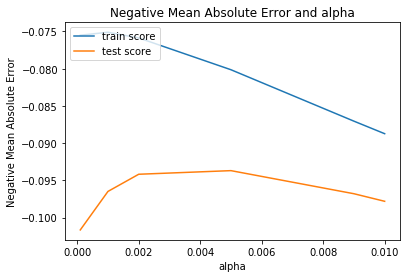

In [153]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [154]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [155]:
lasso.coef_

array([-1.01651841e-02,  1.59560018e-02, -3.49340092e-02, -2.89030476e-02,
        0.00000000e+00, -3.34284450e-03,  0.00000000e+00,  8.16624532e-03,
       -0.00000000e+00,  9.66570972e-03,  5.74751642e-02,  8.33337592e-02,
        2.92329678e-03,  1.99567280e-02,  1.69649181e-03,  6.57794962e-03,
        7.53803836e-03, -1.37744220e-02,  2.03928169e-02,  0.00000000e+00,
       -6.80372078e-03,  3.53161492e-02,  1.24284022e-02, -1.11148344e-03,
        4.32794401e-03,  5.38093683e-03,  8.29899802e-03, -1.52668261e-02,
       -4.51467982e-05,  6.74139308e-03,  2.17217320e-02,  1.43510794e-02,
       -1.99708802e-02, -1.74913602e-03, -0.00000000e+00,  4.25306690e-03,
       -4.15608369e-03,  4.11311721e-03,  4.61495357e-03, -0.00000000e+00,
        1.97001494e-03,  4.17821779e-03, -7.71410775e-03, -2.06659984e-02,
       -6.37245905e-03, -0.00000000e+00, -3.14674240e-02,  3.24227152e-03,
       -0.00000000e+00,  0.00000000e+00, -1.49264651e-02, -4.77398874e-03,
        8.54583645e-04, -

In [156]:
from sklearn.metrics import r2_score 
y_pred_train = lasso.predict(X_train)
print(r2_score(y_train, y_pred_train))
y_pred_test = lasso.predict(X_test)
print(r2_score(y_test, y_pred_test))

0.9200328548526935
0.8681549319909638


In [157]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0, lasso.intercept_)
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_coef = pd.DataFrame(list(zip(cols, model_parameter)))
lasso_coef.columns = ['Feature', 'Coef']

In [158]:
lasso_coef.sort_values(by='Coef', ascending=False).head(6)

,Feature,Coef
0,constant,12.023043
12,2ndFlrSF,0.083334
11,1stFlrSF,0.057475
22,GarageArea,0.035316
77,Neighborhood_NridgHt,0.028023
162,BsmtQual_Ex,0.024682
